In [35]:
import pandas as pd
t= pd.read_csv('/content/train-1.csv')
print(t)

              ID  Estimated_Insects_Count  Crop_Type  Soil_Type  \
0      F00000001                      188          1          0   
1      F00000003                      209          1          0   
2      F00000004                      257          1          0   
3      F00000005                      257          1          1   
4      F00000006                      342          1          0   
...          ...                      ...        ...        ...   
88853  F00155935                     3337          1          0   
88854  F00155938                     3516          1          0   
88855  F00155939                     3516          1          0   
88856  F00155942                     3702          1          0   
88857  F00155945                     3895          1          0   

       Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
0                           1                  0                0.0   
1                           1                  0     

In [36]:
t = t.sample(n=1000)

# Save the new dataset to a CSV file
t.to_csv('new_dataset.csv', index=False)

In [37]:
c=t['Crop_Type']
print(set(c))

{0, 1}


In [38]:
print(t.isnull().sum())

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          101
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64


In [39]:
t["Number_Weeks_Used"].fillna(0, inplace = True)

In [40]:
print(t.dtypes)

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object


In [41]:
print(set(t["Number_Weeks_Used"]))

{0.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0}


In [42]:
tt=t.drop('ID',axis=1)

In [43]:
y=tt['Crop_Damage']
print("THE TARGET VAIRIABLE")
print(y)

THE TARGET VAIRIABLE
68152    0
84279    0
73153    0
82534    2
39081    0
        ..
68998    0
72564    0
4836     0
79607    0
80448    0
Name: Crop_Damage, Length: 1000, dtype: int64


In [44]:
x=tt.drop('Crop_Damage',axis=1)
print(x)

       Estimated_Insects_Count  Crop_Type  Soil_Type  Pesticide_Use_Category  \
68152                     2401          0          1                       2   
84279                      789          1          1                       3   
73153                     2542          0          1                       2   
82534                     3702          0          0                       2   
39081                      916          0          0                       2   
...                        ...        ...        ...                     ...   
68998                      209          1          0                       3   
72564                      732          0          1                       2   
4836                       731          1          0                       2   
79607                     1212          0          0                       2   
80448                     1297          0          1                       2   

       Number_Doses_Week  Number_Weeks_

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

       Estimated_Insects_Count  Crop_Type  Soil_Type  Pesticide_Use_Category  \
6896                      1385          0          1                       2   
38409                     1478          0          0                       3   
32163                     1056          0          1                       2   
40025                     1385          0          1                       2   
8987                       531          0          1                       2   
...                        ...        ...        ...                     ...   
49364                     1385          0          0                       2   
20268                     2542          1          0                       2   
6866                      1385          0          1                       2   
30787                     2267          0          0                       3   
12246                     2688          0          1                       2   

       Number_Doses_Week  Number_Weeks_

In [46]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [48]:
#svm model
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0)

svm_classifier.fit(x_train, y_train)

y_pred = svm_classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [49]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy using SVM model:", accuracy)

Accuracy using SVM model: 0.845


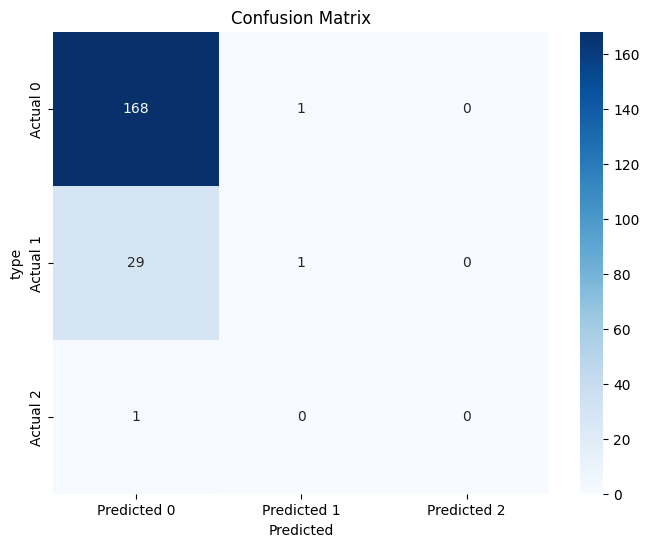

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Predicted {i}' for i in set(y)],
            yticklabels=[f'Actual {i}' for i in set(y)])
plt.xlabel('Predicted')
plt.ylabel('type')
plt.title('Confusion Matrix')
plt.show()


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy using logistic regression:', accuracy)

Accuracy using logistic regression: 0.845


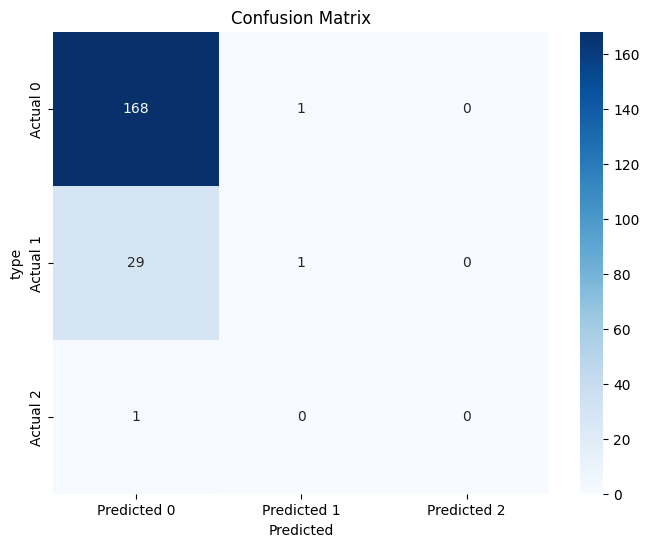

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Predicted {i}' for i in set(y)],
            yticklabels=[f'Actual {i}' for i in set(y)])
plt.xlabel('Predicted')
plt.ylabel('type')
plt.title('Confusion Matrix')
plt.show()
